In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns

In [2]:
data = yf.download("EURUSD=X GBPUSD=X AUDUSD=X NZDUSD=X CADUSD=X CHFUSD=X FJDUSD=X GHSUSD=X	JPYUSD=X KYDUSD=X	SGDUSD=X THBUSD=X	BYNUSD=X	MYRUSD=X	HUFUSD=X	ARSUSD=X",
                   start = '2021-01-01',end='2021-10-14',period='1d')

[*********************100%***********************]  16 of 16 completed


In [3]:
df = data['Adj Close']

In [4]:
df.stack().groupby(level=1).head(1)

Date                
2020-12-31  ARSUSD=X    0.011885
            AUDUSD=X    0.768929
            BYNUSD=X    0.386325
            CADUSD=X    0.784271
            CHFUSD=X    1.134327
            EURUSD=X    1.229990
            FJDUSD=X    0.492902
            GBPUSD=X    1.363066
            GHSUSD=X    0.170940
            HUFUSD=X    0.003377
            JPYUSD=X    0.009697
            KYDUSD=X    1.223824
            MYRUSD=X    0.247831
            NZDUSD=X    0.721540
            SGDUSD=X    0.755892
            THBUSD=X    0.033424
dtype: float64

In [6]:
df = df.fillna(method='ffill')
df

,ARSUSD=X,AUDUSD=X,BYNUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,FJDUSD=X,GBPUSD=X,GHSUSD=X,HUFUSD=X,JPYUSD=X,KYDUSD=X,MYRUSD=X,NZDUSD=X,SGDUSD=X,THBUSD=X
Date,,,,,,,,,,,,,,,,
2020-12-31,0.011885,0.768929,0.386325,0.784271,1.134327,1.229990,0.492902,1.363066,0.170940,0.003377,0.009697,1.223824,0.247831,0.721540,0.755892,0.033424
2021-01-01,0.011895,0.770297,0.383408,0.809723,1.113462,1.218027,0.490196,1.367301,0.171233,0.003370,0.009687,1.224190,0.248756,0.718200,0.756659,0.033444
2021-01-04,0.011869,0.771230,0.381441,0.786034,1.132375,1.225070,0.492902,1.368420,0.170109,0.003383,0.009686,1.217919,0.248756,0.719839,0.757191,0.033385
2021-01-05,0.011817,0.767100,0.388088,0.782411,1.134765,1.225160,0.492199,1.357160,0.172117,0.003393,0.009697,1.224503,0.249750,0.717829,0.757409,0.033434
2021-01-06,0.011794,0.776600,0.387193,0.788973,1.138719,1.230027,0.495810,1.362955,0.171233,0.003429,0.009739,1.222459,0.249066,0.725689,0.759180,0.033422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,0.010111,0.728141,0.401819,0.794521,1.077935,1.155535,0.477395,1.359213,0.165890,0.003221,0.008976,1.227393,0.239063,0.691582,0.736111,0.029586
2021-10-08,0.010116,0.731680,0.402211,0.797003,1.077122,1.155976,0.478400,1.362027,0.166945,0.003226,0.008956,1.225646,0.239177,0.693818,0.736703,0.029595
2021-10-11,0.010125,0.729490,0.406097,0.801019,1.077760,1.156604,0.478400,1.361656,0.165697,0.003207,0.008907,1.226081,0.239320,0.692161,0.737877,0.029499


In [7]:
df_ret = df.pct_change()

In [8]:
df_ret = df_ret.loc[~df_ret.isnull().sum(1).astype(bool)]

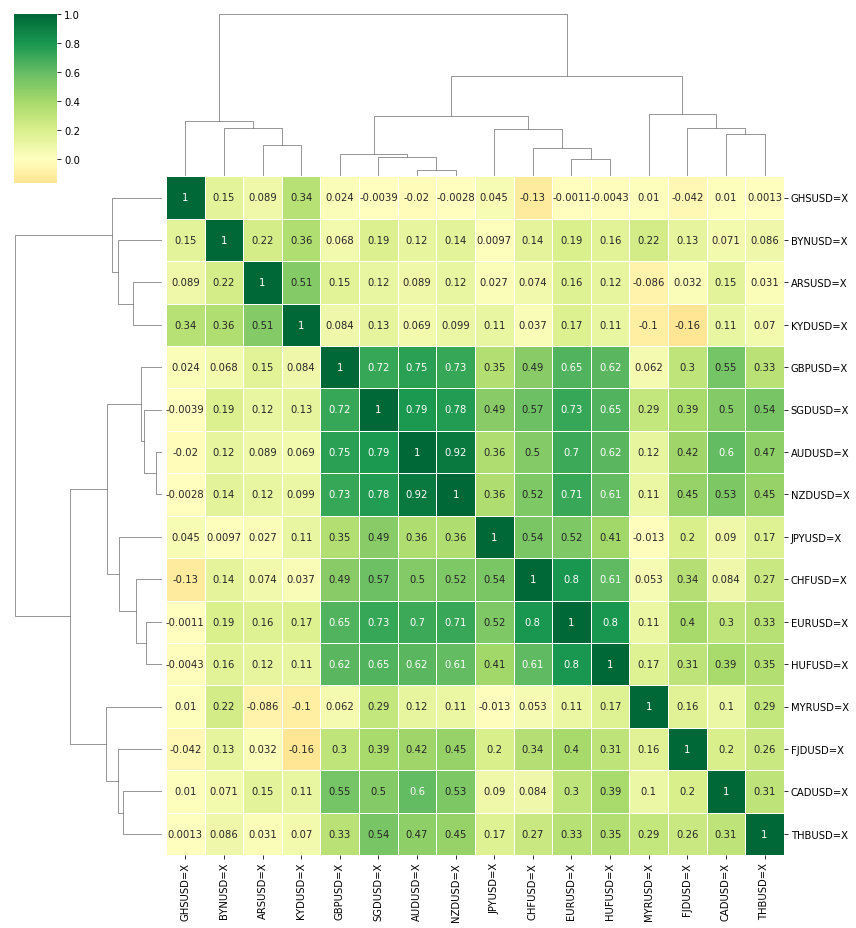

In [9]:
g = sns.clustermap(df_ret.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(12, 13),
                   annot = True)

In [10]:
group1 = df[['GBPUSD=X', 'SGDUSD=X', 'AUDUSD=X', 'NZDUSD=X']]
group2 = df[['CHFUSD=X', 'EURUSD=X', 'HUFUSD=X']]

In [11]:
group1_geo_ret = (group1.pct_change()+1).cumprod()

In [12]:
group1.pct_change()+1

,GBPUSD=X,SGDUSD=X,AUDUSD=X,NZDUSD=X
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-01,1.003107,1.001014,1.001779,0.995371
2021-01-04,1.000818,1.000704,1.001211,1.002282
2021-01-05,0.991772,1.000288,0.994645,0.997208
2021-01-06,1.004270,1.002338,1.012384,1.010951
...,...,...,...,...
2021-10-07,0.997390,0.998903,0.998719,0.994124
2021-10-08,1.002070,1.000803,1.004860,1.003233
2021-10-11,0.999728,1.001594,0.997008,0.997612


<AxesSubplot:xlabel='Date'>

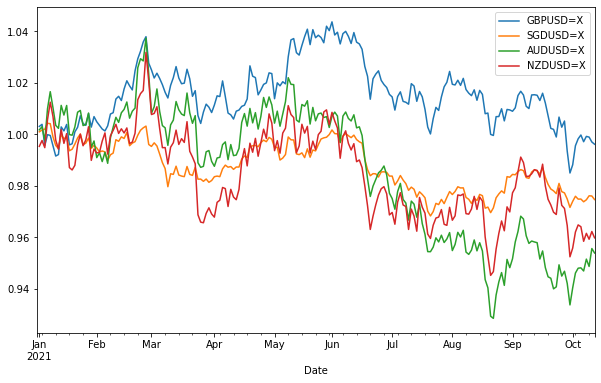

In [13]:
group1_geo_ret.plot(figsize=(10,6))

In [14]:
group2_geo_ret = (group2.pct_change()+1).cumprod()

<AxesSubplot:xlabel='Date'>

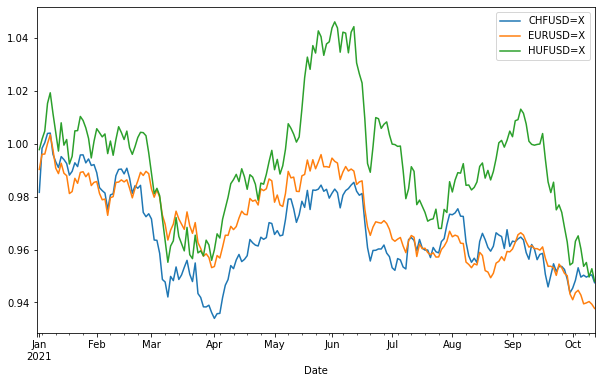

In [15]:
group2_geo_ret.plot(figsize=(10,6))